#### 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터(집단)로 묶는 알고리즘
#### 어느 클러스터에도 속하지 못하는 관측값이 존재할 수 있음 -> 특이 데이터 찾는데 활용
#### 비지도 학습 -> 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단

## k-Means

#### - 데이터 간의 유사성을 측정하는 기준
#### - 각 클러스터의 중심까지의 거리를 이용
#### - 여러개의 클러스터 중 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터 할당
#### - k 값에 따라 모형의 성능이 달라짐
#### - k가 클수록 모형의 정확도 개선, but 너무 커지면 분석 효과 down

### 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

print(df.head())   
print('\n')

print(df.info())  
print('\n')

print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

#### ※ 비지도 학습 모형이므로 예측 변수를 지정할 필요 X, 필요한 속성을 모두 설명 변수로 활용

In [2]:
# 분석에 사용할 속성을 선택
X = df.iloc[:, :]    #데이터 전체를 설명 변수로 활용
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


### 모형 학습 및 검증

In [3]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)    #클러스터의 개수를 5로 설정

# 모형 학습
kmeans.fit(X)   

# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   

[3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 0 3 0 3 0 3 0 0 4 3 3 0 0 3 0 0 0 0 0 0 3 0
 3 3 0 0 0 3 3 3 3 3 1 3 3 0 0 3 3 0 0 1 3 0 0 3 1 3 3 0 1 0 3 0 0 0 0 0 3
 3 0 0 3 0 0 0 3 3 0 3 1 1 0 0 0 0 0 1 0 3 0 3 0 0 0 3 3 3 0 0 0 3 3 3 3 0
 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 3 3 0 3 3 3 0 0 3 3 3 3 0 0 0 3 3 0 3 0 3 0 0 0 0 0 4 0 4 0
 0 0 0 3 3 0 0 0 3 0 0 2 3 2 2 3 3 2 2 2 3 2 2 2 3 2 1 2 2 3 2 3 2 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 3 2 3 2 2 2 2 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 3 2 3
 2 3 3 2 3 3 3 3 3 3 3 2 2 3 2 2 3 2 2 3 2 2 2 3 2 2 2 2 2 4 2 2 2 2 2 3 2
 1 2 3 2 2 2 2 3 3 0 3 0 0 3 3 0 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 3 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 3 3 0 0 0 0 0 0 3 3 0 3 0 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

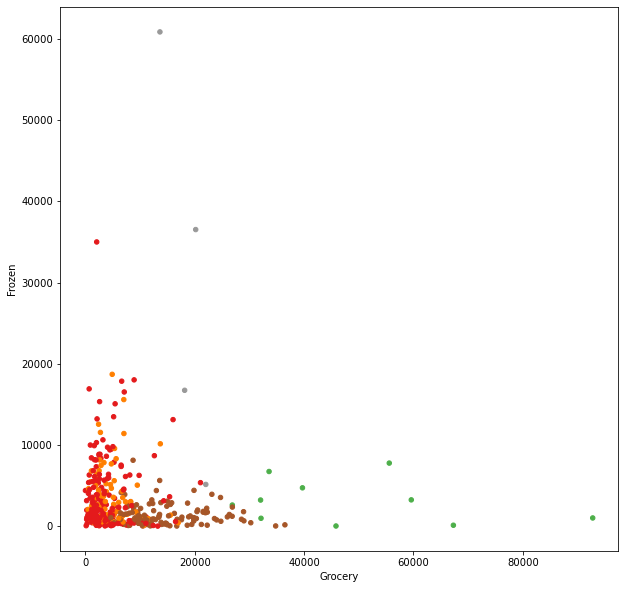

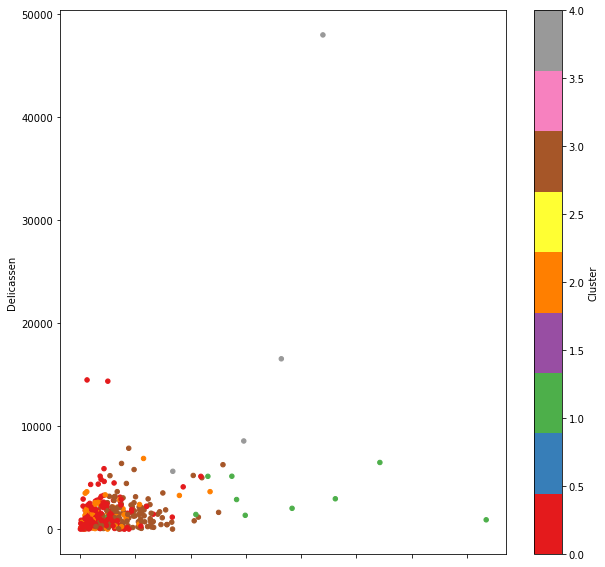

In [4]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

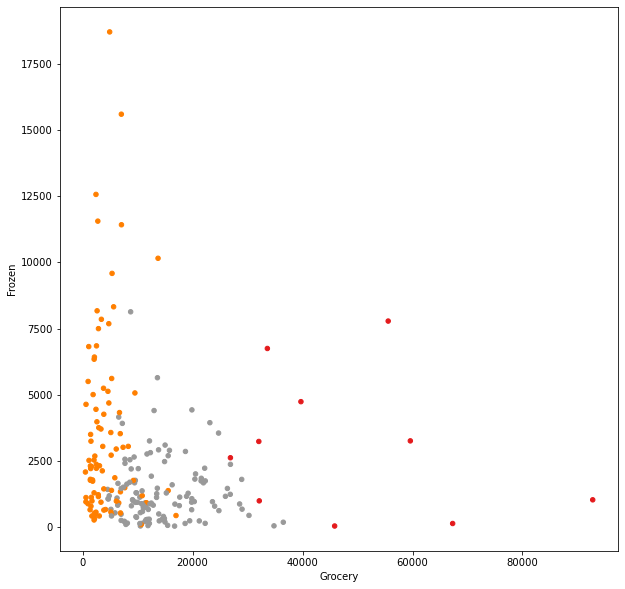

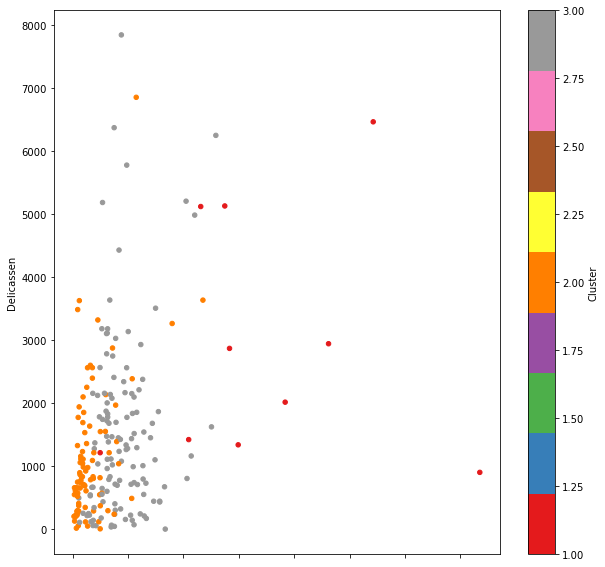

In [5]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

## DBSCAN

#### Density-Based Spatial Clustering of Applications with Noise
#### 데이터가 위치하고 있는 공간 밀집도를 기준을 클러스터 구분

#### - 코어 포인트 : 자기를 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재하는 점
#### - 경계 포인트 : 코어 포인트는 아니지만 반지름 R 안에 다른 코어 포인트가 있을 경우
#### - Noise(outlier) : 코어 포인트도 아니고 경계 포인트에도 속하지 않는 점